## Name: Vedant Shigwan | Email: vedantshigwan11@gmail.com

# OASIS INFOBYTE Intership, Feb-2025

# DATA SCIENCE (TASK 3)

_________

## >> Car Price Prediction with Machine Learning

### Importing the required libraries

In [15]:
import pandas as pd  # For handling datasets
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # Advanced data visualizations
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encoding & scaling
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.ensemble import RandomForestRegressor  # Random Forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics

### Load the Dataset

In [16]:
df = pd.read_csv('car data.csv')
df

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual      0  
2         Dealer       Manual      0  
3         Dealer       Manual      0  
4         Dealer       Manual      0  
..           ...          ...    ...  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  

[301 rows x 9 columns]

### Head Function

In [17]:
df.head()  # Display first 5 rows

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0

### Tail Function

In [18]:
df.tail()

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5        9000    Diesel   
300     brio  2016           5.30            5.9        5464    Petrol   

    Selling_type Transmission  Owner  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0

### Shape of data

In [19]:
df.shape

(301, 9)

### Info of dataset

In [20]:
df.info()  # Get column names, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Describing the dataset

In [21]:
df.describe()  # Get statistical summary of numerical columns

Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

### Check for Null Values

In [22]:
df.isnull()

Car_Name   Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0       False  False          False          False       False      False   
1       False  False          False          False       False      False   
2       False  False          False          False       False      False   
3       False  False          False          False       False      False   
4       False  False          False          False       False      False   
..        ...    ...            ...            ...         ...        ...   
296     False  False          False          False       False      False   
297     False  False          False          False       False      False   
298     False  False          False          False       False      False   
299     False  False          False          False       False      False   
300     False  False          False          False       False      False   

     Selling_type  Transmission  Owner  
0           False         False  False  
1           False         False  False  
2           False         False  False  
3           False         False  False  
4           False         False  False  
..            ...           ...    ...  
296         False         False  False  
297         False         False  False  
298         False         False  False  
299         False         False  False  
300         False         False  False  

[301 rows x 9 columns]

In [23]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## DATA VISUALIZATION

### Distribution of Car Prices

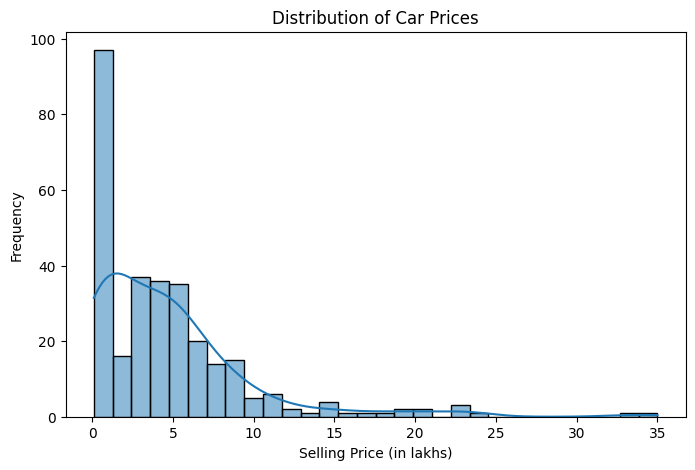

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Selling_Price"], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Selling Price (in lakhs)")
plt.ylabel("Frequency")
plt.show()

### Fuel Type vs. Selling Price

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Fuel_Type", y="Selling_Price", data=df)
plt.title("Fuel Type vs. Selling Price")
plt.show()

### Correlation Heatmap

In [26]:
df_encoded = df.copy()
for col in df.select_dtypes(include=["object"]).columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes   # Convert to category codes

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

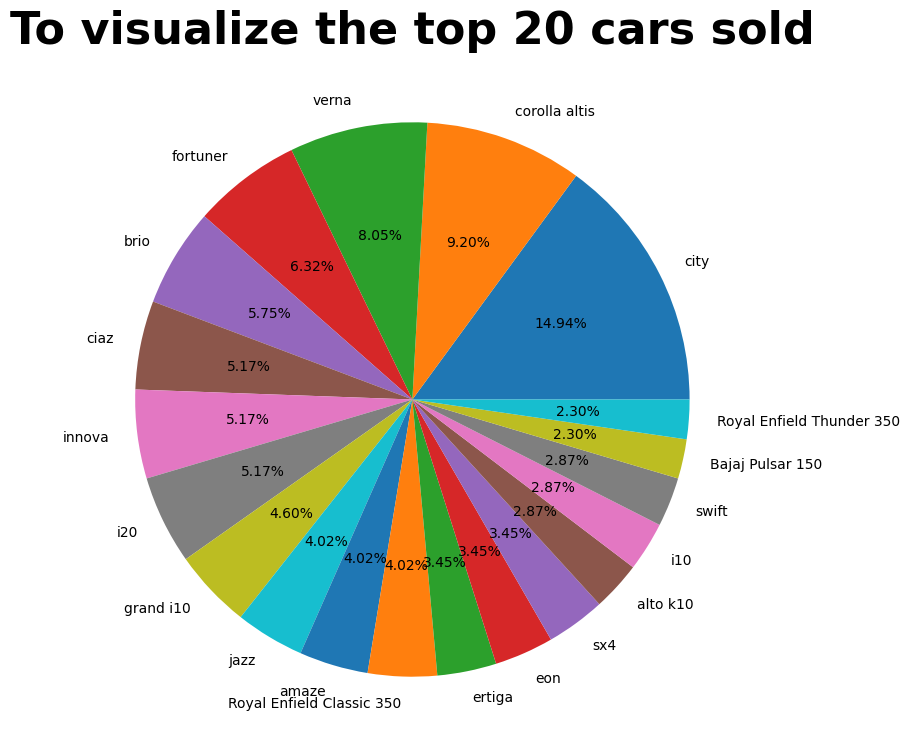

In [27]:
#Let's visualize the car names in the dataset
car_names=df['Car_Name'].value_counts()
#To visualize the top 20 car's sold
label=['city','corolla altis','verna','fortuner','brio','ciaz','innova','i20','grand i10','jazz','amaze','Royal Enfield Classic 350','ertiga','eon','sx4','alto k10','i10','swift','Bajaj Pulsar 150','Royal Enfield Thunder 350']
plt.figure(figsize=(16,9))
plt.pie(car_names[:20],labels=label, autopct='%1.2f%%')
plt.title("To visualize the top 20 cars sold",fontsize=32,fontweight='bold')
plt.show()

## Data Preprocessing

### Drop Unnecessary Columns
If Car_Name do not contribute to price prediction, we can remove them.

In [28]:
df.drop(["Car_Name"], axis=1, inplace=True)

In [29]:
df

Year  Selling_Price  Present_Price  Driven_kms Fuel_Type Selling_type  \
0    2014           3.35           5.59       27000    Petrol       Dealer   
1    2013           4.75           9.54       43000    Diesel       Dealer   
2    2017           7.25           9.85        6900    Petrol       Dealer   
3    2011           2.85           4.15        5200    Petrol       Dealer   
4    2014           4.60           6.87       42450    Diesel       Dealer   
..    ...            ...            ...         ...       ...          ...   
296  2016           9.50          11.60       33988    Diesel       Dealer   
297  2015           4.00           5.90       60000    Petrol       Dealer   
298  2009           3.35          11.00       87934    Petrol       Dealer   
299  2017          11.50          12.50        9000    Diesel       Dealer   
300  2016           5.30           5.90        5464    Petrol       Dealer   

    Transmission  Owner  
0         Manual      0  
1         Manual      0  
2         Manual      0  
3         Manual      0  
4         Manual      0  
..           ...    ...  
296       Manual      0  
297       Manual      0  
298       Manual      0  
299       Manual      0  
300       Manual      0  

[301 rows x 8 columns]

### Encode Categorical Variables

Since machine learning models work with numerical data, we convert categorical values into numbers.

In [30]:
encoder = LabelEncoder()

df["Fuel_Type"] = encoder.fit_transform(df["Fuel_Type"])
df["Transmission"] = encoder.fit_transform(df["Transmission"])
df["Seller_Type"] = encoder.fit_transform(df["Selling_type"])
df["Owner"] = encoder.fit_transform(df["Owner"])

In [31]:
df

Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type Selling_type  \
0    2014           3.35           5.59       27000          2       Dealer   
1    2013           4.75           9.54       43000          1       Dealer   
2    2017           7.25           9.85        6900          2       Dealer   
3    2011           2.85           4.15        5200          2       Dealer   
4    2014           4.60           6.87       42450          1       Dealer   
..    ...            ...            ...         ...        ...          ...   
296  2016           9.50          11.60       33988          1       Dealer   
297  2015           4.00           5.90       60000          2       Dealer   
298  2009           3.35          11.00       87934          2       Dealer   
299  2017          11.50          12.50        9000          1       Dealer   
300  2016           5.30           5.90        5464          2       Dealer   

     Transmission  Owner  Seller_Type  
0               1      0            0  
1               1      0            0  
2               1      0            0  
3               1      0            0  
4               1      0            0  
..            ...    ...          ...  
296             1      0            0  
297             1      0            0  
298             1      0            0  
299             1      0            0  
300             1      0            0  

[301 rows x 9 columns]

### Feature Scaling

Some columns like mileage, engine, and power have different ranges, so we scale them.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["Present_Price", "Driven_kms"]] = scaler.fit_transform(df[["Present_Price", "Driven_kms"]])

In [33]:
df

Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type Selling_type  \
0    2014           3.35      -0.236256   -0.256224          2       Dealer   
1    2013           4.75       0.221544    0.155911          1       Dealer   
2    2017           7.25       0.257472   -0.773969          2       Dealer   
3    2011           2.85      -0.403151   -0.817758          2       Dealer   
4    2014           4.60      -0.087906    0.141743          1       Dealer   
..    ...            ...            ...         ...        ...          ...   
296  2016           9.50       0.460295   -0.076225          1       Dealer   
297  2015           4.00      -0.200328    0.593804          2       Dealer   
298  2009           3.35       0.390756    1.313340          2       Dealer   
299  2017          11.50       0.564604   -0.719876          1       Dealer   
300  2016           5.30      -0.200328   -0.810958          2       Dealer   

     Transmission  Owner  Seller_Type  
0               1      0            0  
1               1      0            0  
2               1      0            0  
3               1      0            0  
4               1      0            0  
..            ...    ...          ...  
296             1      0            0  
297             1      0            0  
298             1      0            0  
299             1      0            0  
300             1      0            0  

[301 rows x 9 columns]

### Splitting Data into Training & Testing Sets
* X contains independent variables (features).
* y contains dependent variable (target = Selling Price).
* 80% data for training, 20% for testing.

In [34]:
X = df.drop("Selling_Price", axis=1)  # Features
y = df["Selling_Price"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Machine Learning Models

#### Train a Linear Regression Model

In [ ]:
X_train = X_train.drop(columns=["Car_Name"])

In [ ]:
X_train = pd.get_dummies(X_train, columns=["Fuel_Type", "Selling_type", "Transmission"], drop_first=True)

In [37]:
print(X_train.isnull().sum())

Year             0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Seller_Type      0
dtype: int64


In [49]:
X_train = X_train.fillna(X_train.select_dtypes(include=['number']).mean())

In [50]:
print(X_train.dtypes)

Year               int64
Present_Price    float64
Driven_kms       float64
Fuel_Type          int64
Selling_type      object
Transmission       int64
Owner              int64
Seller_Type        int64
dtype: object


In [52]:
X_train = pd.get_dummies(X_train, drop_first=True)  # Converts categorical to numerical

In [53]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


#### Train a Random Forest Regressor

In [54]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Make Predictions

In [55]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train columns: Index(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Transmission',
       'Owner', 'Seller_Type', 'Selling_type_Individual'],
      dtype='object')
X_test columns: Index(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission', 'Owner', 'Seller_Type'],
      dtype='object')


In [56]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Step 1️⃣: Identify categorical columns in X_test (as they are unencoded)
categorical_cols_test = ['Fuel_Type', 'Selling_type', 'Transmission']

# Step 2️⃣: Initialize OneHotEncoder (same settings as used on X_train)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Step 3️⃣: Fit encoder on X_test categorical columns (same categories as X_train)
X_test_encoded = encoder.fit_transform(X_test[categorical_cols_test])

# Step 4️⃣: Convert encoded data to DataFrame with correct column names
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out())

# Step 5️⃣: Drop original categorical columns from X_test
X_test = X_test.drop(columns=categorical_cols_test, errors='ignore')

# Step 6️⃣: Merge transformed features into X_test
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Step 7️⃣: Ensure X_test and X_train have the same columns
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Add missing columns with default value (zero)

X_test = X_test[X_train.columns]  # Reorder columns to match X_train

# 🔍 Final check
print("Final X_train columns:", X_train.columns)
print("Final X_test columns:", X_test.columns)

# Train the model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)
print("Predictions:", y_pred_lr)


Final X_train columns: Index(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Transmission',
       'Owner', 'Seller_Type', 'Selling_type_Individual'],
      dtype='object')
Final X_test columns: Index(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Transmission',
       'Owner', 'Seller_Type', 'Selling_type_Individual'],
      dtype='object')
Predictions: [ 6.21239916 12.5968617   9.01176886  3.55789602 13.529979   10.00199595
  6.2284676   5.70243497  6.25493306 10.07155448 11.72806185  5.45445379
 11.1552597   6.68001855  9.46282073  7.37605049  5.32947737 15.18751549
  6.6525213   7.25400093  5.24685656 10.70774593  9.16591118  6.93288294
  5.65600356  8.00630428  9.61694617  7.12057032  7.04703443  6.65369297
  5.24957909 11.74755759  4.15726228  6.56604316 11.18612952  8.83343591
 11.62815461 11.93740392  7.20815282 12.34104784  8.24151955  6.94691679
  8.65939419  5.48238405  9.91581314  5.34160642 11.69951398 14.05548052
  7.44117553  7.91089398  9.5118402   7.085461

### Evaluate Model Performance

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ensure predictions are defined
y_pred_lr = lr_model.predict(X_test)  # Predictions using Linear Regression
y_pred_rf = rf_model.predict(X_test)  # Predictions using Random Forest

# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Call function with correct variables
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")



Model: Linear Regression
Mean Absolute Error (MAE): 4.44
Mean Squared Error (MSE): 21.94
Root Mean Squared Error (RMSE): 4.68
R² Score: 0.05

Model: Random Forest Regressor
Mean Absolute Error (MAE): 0.94
Mean Squared Error (MSE): 2.06
Root Mean Squared Error (RMSE): 1.44
R² Score: 0.91
